## Aula 5: Gereciamento de portfolios

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
from pandas_datareader.data import DataReader

%matplotlib inline

In [5]:
df_ciel3 = DataReader('CIEL3.SA', data_source='yahoo',
                      start='2009-1-1')['Adj Close']

In [6]:
df_value = pd.DataFrame(np.arange(20, 100, 20),
                        index=pd.date_range(start='2020',
                                            periods=4, freq='Q'),
                        columns=['values'])

df_value['pct change'] = df_value['values'].pct_change()
df_value['cumulative sum'] = df_value['values'].cumsum()
df_value['cumulative product'] = df_value['values'].cumprod()
df_value

,values,pct change,cumulative sum,cumulative product
2020-03-31,20,NaN,20,20
2020-06-30,40,1.000000,60,800
2020-09-30,60,0.500000,120,48000
2020-12-31,80,0.333333,200,3840000


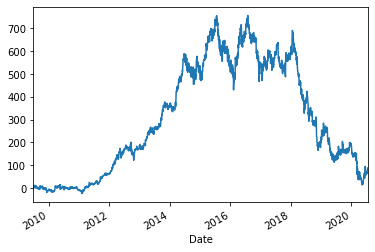

In [7]:
# taxa de retorno
(((df_ciel3.pct_change() + 1).cumprod() - 1)*100).plot()

In [8]:
df_ciel_run = df_ciel3.to_frame('value').copy()

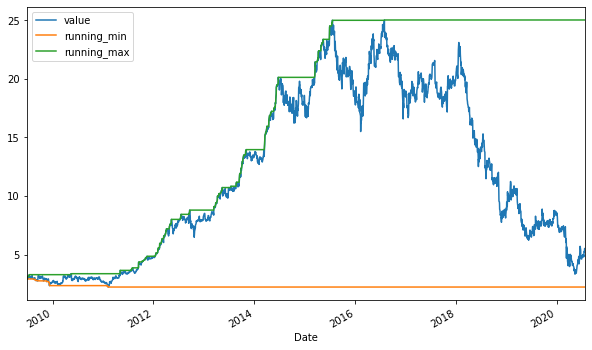

In [9]:
# valor máximo e mínimo
df_ciel_run = df_ciel3.to_frame('value').copy()
df_ciel_run['running_min'] = df_ciel_run['value'].expanding().min()
df_ciel_run['running_max'] = df_ciel_run['value'].expanding().max()
df_ciel_run.plot(figsize=(10, 6))

## 1. Univariate investment risk

**O que é risco?**

- medida de incerteza
- dispersão ou variância de retornos financeiros

**Como medir risco?**

- desvio padrão ou variância de retornos diários
- kurtosis da distribuição de retorno diária
- skewness da distribuição de retorno diária
- histórico drawdown

**Tipos de retornos:**

- Retorno discreto (retorno simples) são o tipo mais comum e representam movimentos de preços periódicos
- Retorno logarítimo são mais aplicados em pesquisas acadêmicas e modelagem financeiras; assumem composição contínua

**Cálculo de retorno de ações**

- retorno discreto são calculados como mudança no preço percentual

$${R_{t2}} = \frac{P_{t2} - P_{t1}}{P_{t1}}$$


#### Importando ações do bovespa

https://finance.yahoo.com/

In [10]:
# exemplo de açoes itsa4
DataReader(st_itsa4, data_source='yahoo', start='2010-1-1').head()

NameError: name 'st_itsa4' is not defined

In [11]:
st_itsa4 = 'ITSA4.SA'
st_flry3 = 'FLRY3.SA'
st_lren3 = 'LREN3.SA'

df_st = pd.DataFrame()

stocks = [st_itsa4, st_flry3, st_lren3]
for stock in stocks:
    df_st[stock]=DataReader(stock,
                            data_source='yahoo',
                            start='2010-1-1')['Adj Close']

In [12]:
df_st.head()

,ITSA4.SA,FLRY3.SA,LREN3.SA
Date,,,
2010-01-04,4.007836,5.291858,2.524632
2010-01-05,3.994874,5.262620,2.433682
2010-01-06,3.946275,5.452658,2.386643
2010-01-07,3.923598,5.470201,2.364685
2010-01-08,3.894438,5.581301,2.377231


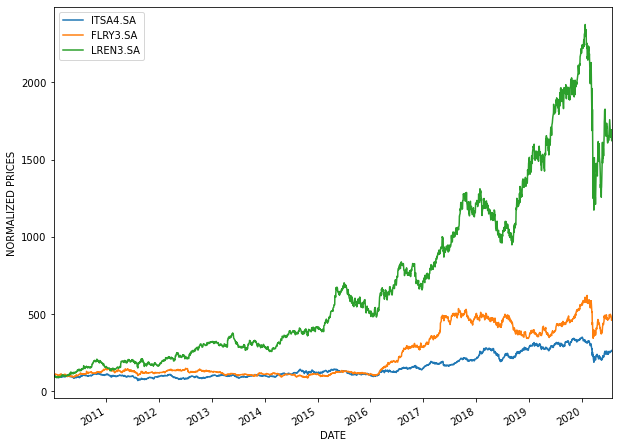

In [13]:
(df_st / df_st.iloc[0] * 100).plot(figsize=(10, 8))
plt.ylabel('NORMALIZED PRICES')
plt.xlabel('DATE')
plt.show()

#### Retorno diário

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

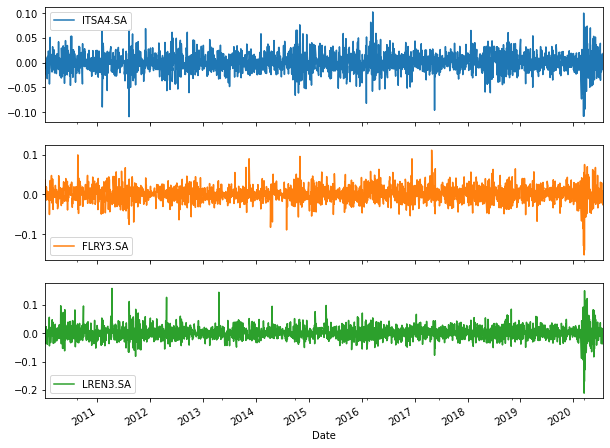

In [14]:
df_st.pct_change().plot(subplots=True, figsize=(10, 8))
plt.show()

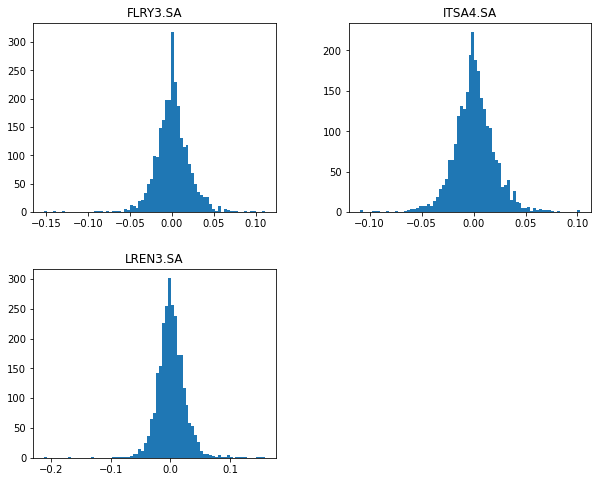

In [15]:
df_st.pct_change().hist(figsize=(10, 8), bins=75, grid=False)
plt.show()

**Comparando retorno financeiros com distribuições normais:**

- distribuições normais tem assimetria próxima de 0 e curtose próximo de 3
- retornos financeiros tendem a não ter distribuição normal
- retornos financeiros podem ter curtose alta

In [16]:
# média do retorno
print('média diária do retorno de cada ativo')
print(df_st.pct_change().dropna().mean(), '\n')

# média do retorno anualizado - 252 dias úteis no ano
print('média anualizada do retorno de cada ativo')
print(((1 + df_st.pct_change().dropna().mean())**252)-1)

média diária do retorno de cada ativo
ITSA4.SA    0.000566
FLRY3.SA    0.000788
LREN3.SA    0.001347
dtype: float64 

média anualizada do retorno de cada ativo
ITSA4.SA    0.153398
FLRY3.SA    0.219675
LREN3.SA    0.404015
dtype: float64


**Desvio padrão e variância**

- variância = $\sigma^2$
- desvio padrão (volatilidade) = $\sigma$
- investimento com alto $\sigma$ é visto como investimento de maior risco
- volatilidade escala com a raiz quadrada do tempo
- podemos assumir 252 dias úteis no ano e 21 dias úteis no mês

$$\sigma_{ano} = \sigma_{dia} * \sqrt{252}$$

$$\sigma_{mês} = \sigma_{dia} * \sqrt{21}$$

In [17]:
# volatilidade 
print('volatilidade diária de cada ativo')
print(df_st.pct_change().dropna().std(), '\n')

print('volatilidade anualizada de cada ativo')
print(df_st.pct_change().dropna().std() * np.sqrt(252), '\n')

volatilidade diária de cada ativo
ITSA4.SA    0.019718
FLRY3.SA    0.020004
LREN3.SA    0.023576
dtype: float64 

volatilidade anualizada de cada ativo
ITSA4.SA    0.313006
FLRY3.SA    0.317547
LREN3.SA    0.374250
dtype: float64 



**Assimetria**

- em finanças, buscamos assimetria positiva


![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/446px-Negative_and_positive_skew_diagrams_%28English%29.svg.png)

In [18]:
from scipy.stats import skew

In [19]:
pd.DataFrame(skew(df_st.pct_change().dropna()),
             index=df_st.columns, columns=['skewness'])

,skewness
ITSA4.SA,-0.091009
FLRY3.SA,-0.164979
LREN3.SA,0.193036


**Curtose**

- medida da espessura da cauda da distribuição
- proxy pra probabilidade de outliers
- maioria dos retornos financeiros são leptokurtic (quando a distribuição tem excesso de curtose - maior que 3)
- excess kurtosis = curtose - 3
- alto curtose em excesso = alto risco - mais comum de ter outliers

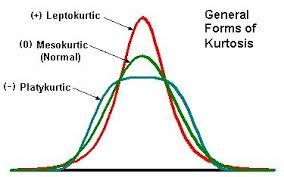

In [20]:
from scipy.stats import kurtosis

In [21]:
pd.DataFrame(kurtosis(df_st.pct_change().dropna()),
             index=df_st.columns, columns=['kurtosis'])

,kurtosis
ITSA4.SA,2.871975
FLRY3.SA,4.656661
LREN3.SA,7.221760


In [23]:
# teste de normalidade dos dados
from scipy import stats

p_value = stats.shapiro(df_st.pct_change().dropna())[1]
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected and data are most likely non-normal")
else:
    print("Null hypothesis of normality is accepted and data are most likely normal")

Null hypothesis of normality is rejected and data are most likely non-normal


## 2. Portfolio investing

**Cálculo de retorno de ações**

- retorno discreto são calculados como mudança no preço percentual

$$R_p = R_{a1}w_{a1} + R_{a2}w_{a2} + ... + R_{an}w_{an}$$

- $R_p$: retorno do portfolio
- $R_{an}$: retorno do ativo n
- $w_{an}$: peso do ativo n

In [24]:
portfolio_weights = np.array([0.3, 0.2, 0.5])
df_st['portfolio'] = df_st.mul(portfolio_weights, axis=1).sum(axis=1)
df_st.head()

,ITSA4.SA,FLRY3.SA,LREN3.SA,portfolio
Date,,,,
2010-01-04,4.007836,5.291858,2.524632,3.523038
2010-01-05,3.994874,5.262620,2.433682,3.467827
2010-01-06,3.946275,5.452658,2.386643,3.467736
2010-01-07,3.923598,5.470201,2.364685,3.453462
2010-01-08,3.894438,5.581301,2.377231,3.473207


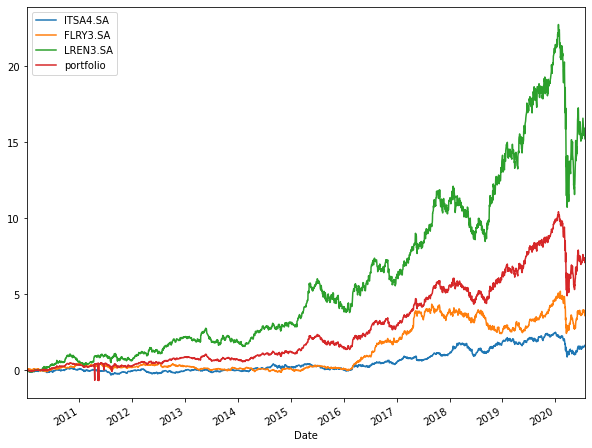

In [25]:
((1+df_st.pct_change().dropna()).cumprod()-1).plot(figsize=(10, 8))

**Desvio padrão do portfolio**

- teoria de portfolio: construir portfolio que tem menor risco que qualquer ativo individual

$$\sigma_p = \sqrt{w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\rho_{1,2}\sigma_1\sigma_2}$$

- $\sigma_p$: desvio padrão do portfolio
- $w$: peso do ativo
- $\sigma$: volatilidade do ativo
- $\rho_{1,2}$: correlação de pearson entre 1 e 2

- mas se tiver mais ativos, podemos usar a matriz de covariância
- correlação é medida normalizada da matriz de covariância
- covariância mede a variabilidade conjunta de 2 variáveis randômicas
- usada para otimização de portfolio e gerenciamento de risco

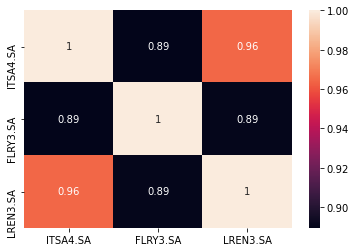

In [26]:
# correlação de pearson 
sns.heatmap(df_st.iloc[:,:3].corr(), annot=True)

In [27]:
# anualizando matriz de covariância
cov_mat = df_st.iloc[:,:3].cov()
cov_mat

,ITSA4.SA,FLRY3.SA,LREN3.SA
ITSA4.SA,8.828744,21.810095,40.751818
FLRY3.SA,21.810095,68.059323,104.403973
LREN3.SA,40.751818,104.403973,201.949194


**Desvio padrão do portfolio utilizando covariância**

- formula para volatilidade do portfolio:

$$\sigma_{portfolio} = \sqrt{w_T \cdot \Sigma \cdot w}$$

- $\sigma_{portfolio}$: volatilidade do portfolio
- $\Sigma$: matrix de covariância dos retornos
- $w$: peso do portfolio

In [28]:
# volatilidade diária do portfolio
np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat, portfolio_weights)))

9.472476424640341

## 3. Factor Investing

### Capital asset pricing model

$$Excess Return = Return - Risk Free Return$$

**Taxa livre de risco**

- nível mínimo de rentabilidade
- geralmente representado pela taxa de juros do país - selic

**CAPM - Modelo de Precificação de Ativos Financeiros**

- método analisa o risco e retorno de cada aplicação
- existem 2 tipos de riscos:
    - risco não diversificável: é aquele sobre o qual quem investe não tem controle, como incertezas políticas, oscilações da inflação ou até taxa de juros
    - risco diversificável: é aquele sobre o qual a pessoa tem controle, e pode ser diminuído por meio da distribuição do patrimônio em ativos com graus de risco diferentes
    
- CAPM busca mensurar risco não diversificável (risco sistêmico)

$$E(R_P) - RF = \beta_p(E(R_M) - RF)$$

- $E(R_P) - RF$: retorno esperado em excesso de uma ação ou portfolio $P$
- $E(R_M) - RF$: retorno esperado em excesso da ampla portfolio de mercado $B$
- $RF$: taxa livre de risco regional
- $\beta_P$: portfolio beta, ou exposição, ao amplo portfólio de mercado $B$

**Cálculo do beta pela covariância**

$$\beta_P = \frac{Cov(R_P, R_B)}{Var(R_B)}$$

- $Cov(R_P, R_B)$: covariância entre o portfolio $P$ e o benchmark índice de mercado $B$
- $Var(R_B)$: variância do benchmark índice de mercado

In [29]:
df_return = df_st.pct_change().dropna().drop('portfolio', axis=1)
df_return.head()

,ITSA4.SA,FLRY3.SA,LREN3.SA
Date,,,
2010-01-05,-0.003234,-0.005525,-0.036025
2010-01-06,-0.012165,0.036111,-0.019329
2010-01-07,-0.005747,0.003217,-0.009200
2010-01-08,-0.007432,0.020310,0.005305
2010-01-11,-0.003327,0.008381,0.018471


In [30]:
df_mkt = DataReader('^BVSP',
                    data_source='yahoo',
                    start='2010-1-1')['Adj Close']

In [31]:
df_mkt_return = df_mkt.pct_change().dropna()

In [32]:
df_return = df_st.pct_change().dropna()

In [33]:
selic_anual = 3.75
risk_free = ((1 + (selic_anual)/100) ** (1/252)) - 1

In [34]:
risk_free

0.00014609786618535736

In [35]:
df_return.head()

,ITSA4.SA,FLRY3.SA,LREN3.SA,portfolio
Date,,,,
2010-01-05,-0.003234,-0.005525,-0.036025,-0.015671
2010-01-06,-0.012165,0.036111,-0.019329,-0.000026
2010-01-07,-0.005747,0.003217,-0.009200,-0.004116
2010-01-08,-0.007432,0.020310,0.005305,0.005717
2010-01-11,-0.003327,0.008381,0.018471,0.007896


In [36]:
df_portfolio = df_return.loc[:, 'portfolio'].to_frame()
df_portfolio['portfolio_excess'] = df_return['portfolio'] - risk_free

In [37]:
df_portfolio.head()

,portfolio,portfolio_excess
Date,,
2010-01-05,-0.015671,-0.015818
2010-01-06,-0.000026,-0.000173
2010-01-07,-0.004116,-0.004262
2010-01-08,0.005717,0.005571
2010-01-11,0.007896,0.007750


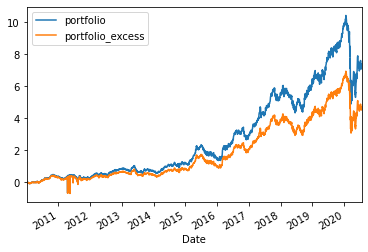

In [38]:
# Plot returns vs excess returns
df_cumulative_returns = ((1+(df_portfolio)).cumprod()-1)
df_cumulative_returns.plot()

In [39]:
df_capm = pd.concat([df_return['portfolio'] - risk_free,
                     df_mkt_return - risk_free], axis=1)
df_capm.columns = ['portfolio_excess', 'market_excess']
df_capm.head()

,portfolio_excess,market_excess
Date,,
2010-01-05,-0.015818,0.002638
2010-01-06,-0.000173,0.006816
2010-01-07,-0.004262,-0.004077
2010-01-08,0.005571,-0.002815
2010-01-11,0.007750,0.002273


In [40]:
import statsmodels.formula.api as smf

In [41]:
# calculo do beta pela regressao linear

model = smf.ols('portfolio_excess ~ market_excess', data=df_capm)
fit = model.fit()

beta = fit.params['market_excess']
print(beta)

0.9182192303152726


In [42]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       portfolio_excess   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     42.13
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           1.02e-10
Time:                        17:59:38   Log-Likelihood:                 1927.0
No. Observations:                2597   AIC:                            -3850.
Df Residuals:                    2595   BIC:                            -3838.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0037      0.002      1.627      0.104      -0.001       0.008
market_excess     0.9182      0.141      6.491      0.000       0.641       1.196
==============================================================================
Omnibus:                     6408.622   Durbin-Watson:                   2.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         60093674.617
Skew:                          25.896   Prob(JB):                         0.00
Kurtosis:                     746.417   Cond. No.                         62.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# calculo do beta pela covariância
df_capm.cov().iloc[0, 1] / df_capm['market_excess'].var()

0.9181174728491251

## 4. Value at risk

Para calcular o VaR historico em um certo nivel, como 5%, basta achar o numero tal que 5% dos retornos caem abaixo desse numero e 95% caem acima. Queremos, então, o percentil 5 dos retornos.

**Exemplos**
- 1-dia 5% VaR de R\$1 mi.
    - Prob. 5% que o portfolio vai perder R$1 mi. ou mais de valor em um período de 1 dia
    
- 10-dias 1% VaR de R\$9 mi.
    - Prob. 1% que o portfolio vai perder R$9 mi. ou mais de valor em um período de 10 dias

**Estimando tail risk**
- O risco de cauda é o risco de resultados extremos de investimento, principalmente no lado negativo de uma distribuição (cauda da esquerda)

    - historical drawdown
    - value at risk
    - conditional value at risk
    - monte-carlo simulation

**Historical drawdown**

- perda percentual do ponto histórico acumulado mais alto

$$Drawdown = \frac{r_t}{RM} - 1$$

- $r_t$: retorno cumulativo no tempo t
- $RM$: running maximum

**Historical value at risk**

- VaR é um limiar com um dado nível de confiança que as perdas não excederam um certo nível históricamente
- Ex.: VaR(95) = -2,3%: 95% de certeza que as perdas não irão exceder -2,3% em um único dia dados valores históricos

In [44]:
running_max = np.maximum.accumulate(df_cumulative_returns)

In [45]:
# certificando que valor nunca seja abaixo de 1
running_max[running_max < 1] = 1

In [46]:
drawdown = (df_cumulative_returns)/running_max - 1

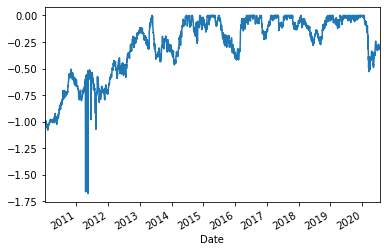

In [47]:
drawdown['portfolio'].plot()

In [48]:
var_95 = df_return['portfolio'].quantile(.05)

In [51]:
df_return.head()

,ITSA4.SA,FLRY3.SA,LREN3.SA,portfolio
Date,,,,
2010-01-05,-0.003234,-0.005525,-0.036025,-0.015671
2010-01-06,-0.012165,0.036111,-0.019329,-0.000026
2010-01-07,-0.005747,0.003217,-0.009200,-0.004116
2010-01-08,-0.007432,0.020310,0.005305,0.005717
2010-01-11,-0.003327,0.008381,0.018471,0.007896


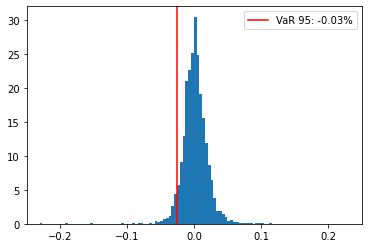

In [49]:
plt.hist(df_return['portfolio'].sort_values(), density=True, bins=1000)

plt.axvline(x=var_95, color='r', linestyle='-',
            label="VaR 95: {0:.2f}%".format(var_95))

plt.xlim((-0.25, 0.25))
plt.legend()
plt.show()

In [50]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})